# Basic concepts of IFP visualisation

This notebook explains how to quantify and visualise IFP within one MD simulation to compare the individual IFP with each other and should be applied after filtering and aggregation based on interaction or time.

In [1]:
import pandas as pd
from IFPAggVis.ifpaggvis import aggregate
from IFPAggVis.ifpaggvis.calculate import calculate_distances
from IFPAggVis.ifpaggvis.calculate import calculate_where_diff_and_sim
from IFPAggVis.ifpaggvis.visualise import plot_similarity_between_ligands
import pickle
import os

Define file names of IFP data set to compare and outputnames

In [2]:
file_path = "../data/aggregated_files/aggregation_time/"

ligand1 = 1
ligand2 = 2
step_size = 1
filter_val_x2 = 0.2
name_file1 = "ligand_" + str(ligand1) + "_x1_filter_" + str(step_size) + "_x2_filter_" + str(filter_val_x2) + "_time_based_aggregation"
name_file2 = "ligand_" + str(ligand2) + "_x1_filter_" + str(step_size) + "_x2_filter_" + str(filter_val_x2) + "_time_based_aggregation"

outpath = "../data/aggregated_files/comparison/"
outfile_name = outpath + "ligand_" + str(ligand1) + "_ligand_" + str(ligand2) + "_x1_" + str(step_size) + "_x2_" + str(filter_val_x2) + "_time"

# Check if outpath exists, otherwise create new directory
if not os.path.exists(outpath):
    os.makedirs(outpath)
    print(outpath + " was created!")

In [3]:
infile_temp1 = file_path + name_file1 + ".csv"
infile_temp2 = file_path + name_file2 + ".csv"


Load aggregated IFP data set

In [4]:
df1 = pd.read_csv(infile_temp1, index_col=0)
df2 = pd.read_csv(infile_temp2, index_col=0)
len(df1.columns),len(df2.columns)

(62, 42)

In [5]:
df1.head(3)

,ARG221_Anionic,ARG221_HBAcceptor,ARG221_HBDonor,ARG221_Hydrophobic,ARG96_Anionic,ARG96_HBAcceptor,ARG96_Hydrophobic,ASN124_Hydrophobic,ASP197_Hydrophobic,ASP208_Cationic,...,TYR272_HBAcceptor,TYR272_Hydrophobic,VAL195_Hydrophobic,VAL223_HBAcceptor,VAL223_HBDonor,VAL223_Hydrophobic,VAL250_HBAcceptor,VAL250_Hydrophobic,occurence,diff_to_prev
0,0,1,0,1,1,1,0,0,0,0,...,1,1,0,0,0,1,0,1,50,[]
1,0,1,0,1,1,1,0,0,0,0,...,1,1,0,0,0,1,0,1,2,2
2,0,0,0,1,1,1,0,0,0,0,...,1,1,0,0,0,1,0,1,68,2


In [6]:
df2.head(3)

,ARG221_HBAcceptor,ARG221_Hydrophobic,ARG221_PiCation,ARG96_Anionic,ARG96_HBAcceptor,ARG96_Hydrophobic,ASN124_HBAcceptor,ASN124_Hydrophobic,ASP197_Hydrophobic,ASP220_Hydrophobic,...,TYR134_HBDonor,TYR134_Hydrophobic,TYR272_HBAcceptor,TYR272_Hydrophobic,VAL195_Hydrophobic,VAL223_Hydrophobic,VAL250_HBAcceptor,VAL250_Hydrophobic,occurence,diff_to_prev
0,1,1,1,1,1,0,0,0,1,1,...,0,1,0,0,1,1,1,1,426,[]
1,1,1,1,1,1,0,0,0,1,1,...,0,1,0,0,1,1,1,1,330,2
2,1,1,1,1,1,0,0,0,0,1,...,0,1,0,0,1,1,1,1,26,2


Merge aggregated IFPs of both ligands to compare them later to each other. <br>
Columns (i.e. interactions) will be merged as well. If an interaction was not present before in one set, it is set to 0 as it was not detected (but could possibly be). Therefore it is considered as absent.

In [7]:
df_merged = aggregate.summarise_two_interaction_dfs(df1, df2, "LG" + str(ligand1), "LG" + str(ligand2))

Number of columns df1:  62
Number of columns df2:  42
Number of columns after merge:  69


In [8]:
df_merged.head(3)

,HOH8_HBAcceptor,HIS66_Hydrophobic,ASP95_Hydrophobic,ARG96_Anionic,ARG96_HBAcceptor,ARG96_Hydrophobic,ASN124_Hydrophobic,ASN124_HBAcceptor,HIS125_EdgeToFace,HIS125_Hydrophobic,...,GLU275_Cationic,GLU275_HBAcceptor,GLU275_HBDonor,GLU275_Hydrophobic,PHE276_Hydrophobic,MN400_VdWContact,MN401_VdWContact,HOH402_HBAcceptor,occurence,Lig
0,1,0.0,0.0,1,1,0,0,0.0,0.0,1,...,0.0,1.0,0.0,1,1,0.0,0,1,50,LG1
1,1,0.0,0.0,1,1,0,0,0.0,0.0,1,...,0.0,1.0,0.0,1,1,0.0,0,0,2,LG1
2,1,0.0,0.0,1,1,0,0,0.0,0.0,1,...,0.0,1.0,0.0,1,1,0.0,0,0,68,LG1


Save merged IFP sets of both ligands to file

In [9]:
df_merged.to_csv(outfile_name + "_merged.csv")

In [10]:
df_merged.iloc[::1, :-2]

,HOH8_HBAcceptor,HIS66_Hydrophobic,ASP95_Hydrophobic,ARG96_Anionic,ARG96_HBAcceptor,ARG96_Hydrophobic,ASN124_Hydrophobic,ASN124_HBAcceptor,HIS125_EdgeToFace,HIS125_Hydrophobic,...,CYS273_Hydrophobic,GLY274_HBAcceptor,GLU275_Cationic,GLU275_HBAcceptor,GLU275_HBDonor,GLU275_Hydrophobic,PHE276_Hydrophobic,MN400_VdWContact,MN401_VdWContact,HOH402_HBAcceptor
0,1,0.0,0.0,1,1,0,0,0.0,0.0,1,...,0,1.0,0.0,1.0,0.0,1,1,0.0,0,1
1,1,0.0,0.0,1,1,0,0,0.0,0.0,1,...,0,1.0,0.0,1.0,0.0,1,1,0.0,0,0
2,1,0.0,0.0,1,1,0,0,0.0,0.0,1,...,0,1.0,0.0,1.0,0.0,1,1,0.0,0,0
3,1,0.0,0.0,1,1,0,0,0.0,0.0,1,...,0,1.0,0.0,1.0,0.0,1,1,0.0,0,0
4,1,0.0,0.0,1,1,0,0,0.0,0.0,0,...,0,1.0,0.0,1.0,0.0,1,1,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,0,0.0,0.0,1,1,1,0,0.0,0.0,0,...,1,0.0,0.0,0.0,0.0,1,1,0.0,0,0
983,0,0.0,0.0,1,1,1,0,0.0,0.0,0,...,1,0.0,0.0,0.0,0.0,1,0,0.0,0,0
984,0,0.0,0.0,1,1,1,0,0.0,0.0,0,...,1,0.0,0.0,0.0,0.0,1,1,0.0,0,0
985,0,0.0,0.0,1,1,1,0,0.0,0.0,0,...,1,0.0,0.0,0.0,0.0,1,1,0.0,0,0


Calculate Distance (or similarity) between all IFPs of both ligands

In [11]:
import numpy as np

In [12]:
X = np.array(df_merged.iloc[::1, :-2])

In [13]:
distances_merged = calculate_distances(X, 4096, "rogerstanimoto")

shape array:  (987, 67)
rogerstanimoto
Time needed for distance calculation: 0.019131813198328018 s


/home/sabrina/anaconda3/envs/prolif-v2/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1870: DataConversionWarning: Data was converted to boolean for metric rogerstanimoto
  warnings.warn(msg, DataConversionWarning)


### Plot distances/similarities as histogram

In [14]:
import matplotlib.pyplot as plt

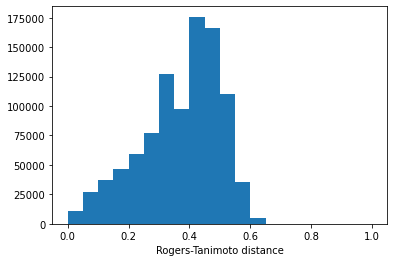

In [15]:
distances = [item for sublist in distances_merged for item in sublist]
plt.hist(distances, bins=20,range=(0,1))
plt.xlabel("Rogers-Tanimoto distance")
plt.show()
plt.savefig(outfile_name + "_distance_hist.jpg", dpi=300)
plt.close()

### Calculate similarities between IFP sets of two ligands

In [16]:
lig_list = ["LG" + str(ligand1), "LG" + str(ligand2)]

Define thresholds for when a ligand is considered as identical, similar and dissimilar. <br>
Please note: we calculated the distance between two IFPs. Therefore, the value will be inverted (1-distance) to enable also the use of similarity metrics to the user.

In [17]:
ident_threshold = 0.95
sim_threshold_low = 0.85
sim_threshold_high = 0.95
dissim_threshold = 0.5

Calculate which values are identical, similar and dissimilar

In [18]:
identical_val, sim_val, dissim_val = calculate_where_diff_and_sim(df_merged["Lig"].to_numpy(), 
                                                                  distances_merged, lig_list, 
                                                                  [ident_threshold], 
                                                                  [sim_threshold_low,sim_threshold_high], 
                                                                  [dissim_threshold], True)

Save results to file

In [19]:
pickle.dump(identical_val, open( outfile_name+"_identical_values.p","wb" ) )


In [20]:
pickle.dump(sim_val, open(outfile_name + "_similar_values.p", "wb" ))

In [21]:
pickle.dump(dissim_val, open(outfile_name + "_dissimilar_values.p","wb" ))

Visualise results in figure <br>
a) to c) represent the IFPs of ligand 1. d) to f) the IFPs of ligand 2. <br>
A vertical line in the plot indicates: 
1) identical IFPs within ligand (a) to b) and e) to f)), <br>
2) similar IFPs within ligand (b) to c) and d) to e)), and <br>
3) between c) and d) identical IFPs between ligands in cyan and similar IFPs between ligands in red.

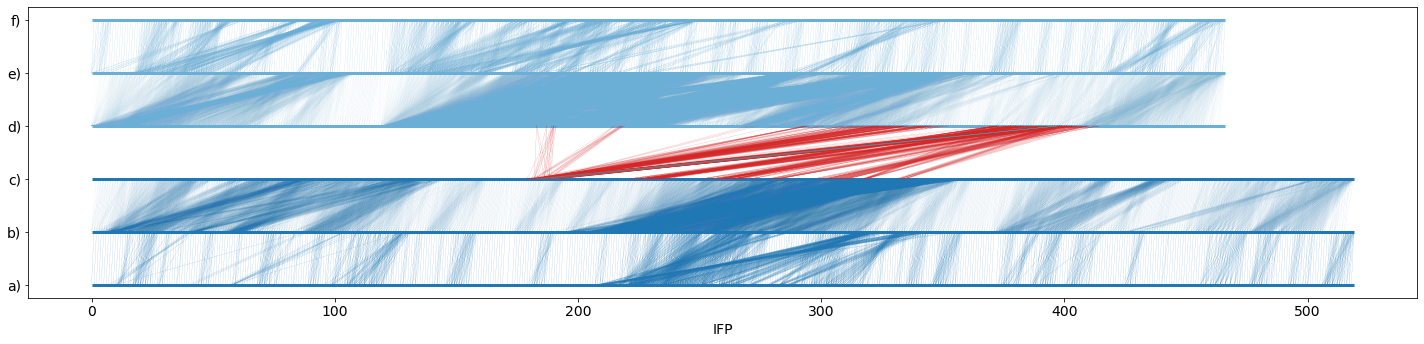

In [22]:
fig = plot_similarity_between_ligands(df_merged["Lig"].to_numpy(), identical_val, sim_val, lig_list)

In [66]:
fig.savefig(outfile_name + "_comparison_plot.svg", dpi=600)

### Percentage calculation of identical and similar IFPs between ligands

In [23]:
from IFPAggVis.ifpaggvis.helpers import evaluate_sim_values
from IFPAggVis.ifpaggvis.calculate import calculate_number_percent_IFP


Generate one dataframe of each similarity class (identical, similar, dissimilar) with IFPs of both ligands that belong to the respective class

In [24]:
df_mixed_sim = evaluate_sim_values(sim_val, str(ligand1), str(ligand2), df_merged)

df_mixed_dissim = evaluate_sim_values(dissim_val, str(ligand1), str(ligand2), df_merged)

df_mixed_id = evaluate_sim_values(identical_val, str(ligand1), str(ligand2), df_merged)


Calculate percentage of IFPs in each similarity class

In [25]:
result = calculate_number_percent_IFP(df_mixed_id, df_mixed_sim, df_mixed_dissim, "occurence", 
                                      df_merged["occurence"].sum())


Save results to file 

In [26]:
outputfile = open(outfile_name + "_comparison_percent_numbers.csv", "w")

header = "ligands compared, number identical, percent identical, number similar, percent similar, number dissimilar, percent dissimilar, identical if, similar if, dissimilar if\n"
outputfile.write(header)

result_string = "lig"+str(ligand1)+"-lig"+str(ligand2)+ "," + str(result[0]) + "," + str(result[1]) + "," + str(result[2]) + "," + str(result[3]) + "," + str(result[4]) + "," + str(result[5])
similarity_eval = str(ident_threshold) + "," + str(sim_threshold_low) + "," + str(sim_threshold_high) + "," + str(dissim_threshold)

data_string = result_string + "," + similarity_eval + "\n"
outputfile.write(data_string)
outputfile.close()

Print results as row formatted for Latex table with information of thresholds and save to file

In [27]:
print("Latex table format: ")
print("ligands compared & number identical & percent identical & number similar & percent similar & number dissimilar &"
      + "percent dissimilar \\\\")
print("lig"+str(ligand1)+"-lig"+str(ligand2)+ " & " + str(result[0]) + " & " + str(result[1]) 
      + " & " + str(result[2]) + " & " + str(result[3]) + " & " + str(result[4]) + " & " + str(result[5]) + "\\\\")

print("\n")
print("Selected threshold values for: \n")
print("identical if: greater than or equal to ", ident_threshold)
print("similar if: greater than or equal to", sim_threshold_low, "and less than", sim_threshold_high)
print("dissimilar if: less than ", dissim_threshold)


Latex table format: 
ligands compared & number identical & percent identical & number similar & percent similar & number dissimilar &percent dissimilar \\
lig1-lig2 & 865 & 0.58 & 26913 & 18.12 & 127550 & 85.89\\


Selected threshold values for: 

identical if: greater than or equal to  0.95
similar if: greater than or equal to 0.85 and less than 0.95
dissimilar if: less than  0.5


In [28]:
print("Latex table format: ")
print("ligands compared & number identical & percent identical & number similar & percent similar & number dissimilar &"
      + "percent dissimilar \\\\")
print("lig"+str(ligand1)+"-lig"+str(ligand2)+ " & " + str(result[0]) + " & " + str(result[1]) 
      + " & " + str(result[2]) + " & " + str(result[3]) + " & " + str(result[4]) + " & " + str(result[5]) + "\\\\")

print("\n")
print("Selected threshold values for: \n")
print("identical if: greater than or equal to ", ident_threshold)
print("similar if: greater than or equal to", sim_threshold_low, "and less than", sim_threshold_high)
print("dissimilar if: less than ", dissim_threshold)


Latex table format: 
ligands compared & number identical & percent identical & number similar & percent similar & number dissimilar &percent dissimilar \\
lig1-lig2 & 865 & 0.58 & 26913 & 18.12 & 127550 & 85.89\\


Selected threshold values for: 

identical if: greater than or equal to  0.95
similar if: greater than or equal to 0.85 and less than 0.95
dissimilar if: less than  0.5


In [29]:
outputfile2 = open(outfile_name + "_comparison_percent_numbers_latex.csv", "w")
outputfile2.write("ligands compared & number identical & percent identical & number similar & percent similar & number dissimilar &"+ "percent dissimilar \\\\")
outputfile2.write("lig"+str(ligand1)+"-lig"+str(ligand2)+ " & " + str(result[0]) + " & " + str(result[1]) + " & " + str(result[2]) + " & " + str(result[3]) + " & " + str(result[4]) + " & " + str(result[5]) + "\\\\")

outputfile2.write("\n")
outputfile2.write("Selected threshold values for: \n")
outputfile2.write("identical if: greater than or equal to " + str(ident_threshold))
outputfile2.write("similar if: greater than or equal to" + str(sim_threshold_low) + "and less than" + str(sim_threshold_high))
outputfile2.write("dissimilar if: less than " + str(dissim_threshold))
outputfile2.close()

### Get most common IFPs representing identical/similar IFPs between ligands

In [30]:
from IFPAggVis.ifpaggvis.aggregate import get_most_common_ifps

Get index where IFPs of ligand 2 start in merged data frames to correct index number for NW image selection

In [31]:
lig2_index = df_merged.index[df_merged['Lig'] == "LG"+ str(ligand2)].tolist()[0]

In [32]:
lig2_index

520

Define string of two ligands to get IFPs from dictionaries with identical/similar IFPs

In [33]:
ligand_compare = "LG" + str(ligand1) + "_LG" + str(ligand2)  

Calculate which IFPs occur most frequently and are identical <br>
To get most frequently occurring IFPs, the occurrence of IFP of ligand 1 and ligand 2 are summed up and the combination resulting in the highest sum is selected.

In [34]:
index_ident, lig1_ident_occ, lig2_ident_occ = get_most_common_ifps(identical_val[ligand_compare], 
                                                                   df_merged["occurence"].values, lig2_index)
if len(lig1_ident_occ) != 0:
    print("Identical IFPs")
    print("occurrence IFP: IFP number ligand " + str(ligand1))
    print(lig1_ident_occ[index_ident])
    print("occurrence IFP: IFP number ligand " + str(ligand2))
    print(lig2_ident_occ[index_ident])
else:
    print("no Identical IFPs")

Identical IFPs
occurrence IFP: IFP number ligand 1
{755: 185}
occurrence IFP: IFP number ligand 2
{79: 397}


Calculate which IFPs occur most frequently and are similar <br>
To get most frequently occurring IFPs, the occurrence of IFP of ligand 1 and ligand 2 are summed up and the combination resulting in the highest sum is selected.

In [35]:
index_sim, lig1_sim_occ, lig2_sim_occ = get_most_common_ifps(sim_val[ligand_compare], 
                                                              df_merged["occurence"].values, lig2_index)
if len(lig1_sim_occ) != 0:
    print("Similar IFPs")
    print("occurrence IFP: IFP number ligand " + str(ligand1))
    print(lig1_sim_occ[index_sim])
    print("occurrence IFP: IFP number ligand " + str(ligand2))
    print(lig2_sim_occ[index_sim])
else:
    print("No Similar IFPs")

Similar IFPs
occurrence IFP: IFP number ligand 1
{755: 185}
occurrence IFP: IFP number ligand 2
{2733: 409}
